In [48]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import dataset
data = pd.read_csv('dataclean.csv')

In [34]:
#Create new predictor dataset with some categorical vars
X = data[['extraversion', 'agreeableness', 'conscientiousness','emotionalstability', 
          'opennesstoexperience','education','gender','religion','voted','married']]

#Define your dependent varaiable, y:
y = data['rwasTot']

In [35]:
#Dummy Code
X = pd.get_dummies(X, columns=['education','gender','religion','voted','married']
          ,drop_first=True)

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
# fit a model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#Print y-intercept of model
print(regressor.intercept_)

102.33906000536835


In [40]:
#Print Coefficients for your predictors
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
extraversion,0.674946
agreeableness,-0.351633
conscientiousness,1.021464
emotionalstability,0.014977
opennesstoexperience,-0.634797
education_2.0,-0.552730
education_3.0,-1.556756
education_4.0,-2.204799
gender_2.0,0.234449
gender_3.0,-0.167733


In [41]:
#Outputs the training and testing scores
print("Training set score: {:.2f}".format(regressor.score(X_train, y_train)))

Training set score: 0.07


In [42]:
#Redo with 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)

In [43]:
print('Cross-validated scores:', all_accuracies)

Cross-validated scores: [0.05572649 0.0871927  0.07625724 0.02015387 0.05791647 0.05714258
 0.07982406 0.0460762  0.06844402 0.05562003]


In [44]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(all_accuracies.mean())

0.060435366626016895


In [45]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

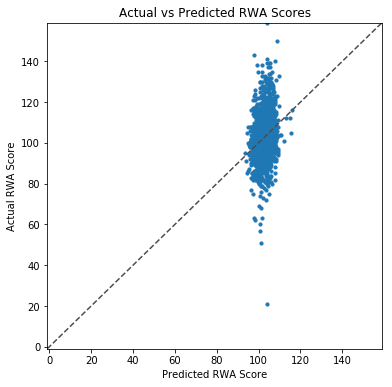

In [50]:
#Graph plotting Actual against Predicted Values
y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of our predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['rwasTot'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['rwasTot'], s=10)
plt.xlabel('Predicted RWA Score')
plt.ylabel('Actual RWA Score')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted RWA Scores')
plt.savefig('ML3_1.png', dpi=300)
plt.show()

In [49]:
#Evaluating the algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 7.599542849437192
Mean Squared Error: 107.9635699801941
Root Mean Squared Error: 10.390551957436818


In [51]:
#Using hypothesis testing to evaluate our p-values
import statsmodels.api as sm 

#training the OLS algorithm and outputting the summary statistics
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
print(sm_model.summary())
print(sm_model.rsquared_adj)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                rwasTot   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     23.70
Date:                Sun, 05 May 2019   Prob (F-statistic):          8.09e-101
Time:                        14:27:34   Log-Likelihood:                -29332.
No. Observations:                7728   AIC:                         5.871e+04
Df Residuals:                    7703   BIC:                         5.889e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.3391      0.123    834.069      0.0